# Video Games Analysis

![Alt text](https://cdn.wallpapersafari.com/69/33/1Oa2Qb.jpg)

In [333]:
# loading essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [334]:
# changing style
plt.style.use("seaborn-v0_8-dark-palette")

In [335]:
# importing dataset
games =pd.read_csv("Games.csv")
games

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access Review,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8
...,...,...,...,...
14796,PC,Doom II Review,Great,8
14797,PC,Dungeon Master II: The Legend of Skullkeep Review,Mediocre,5
14798,PC,Endorfun Review,Good,7
14799,PC,FIFA Soccer 96 Review,Superb,9


### Description of Dataset
The dataset is scraped from gamespot.com
GameSpot is a video gaming website that provides news, reviews, previews, downloads, and other information on video games. The site was launched on May 1, 1996,

### Columns Description
- Console --> Console on which game is working
- GameName --> Name of Game
- Review --> Good/Bad etc
- Score -> Out of 10

## Data Wrangling

### Data Assessing

In [336]:
games.head(5)

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access Review,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8


In [337]:
games.tail(5)

,Console,GameName,Review,Score
14796,PC,Doom II Review,Great,8
14797,PC,Dungeon Master II: The Legend of Skullkeep Review,Mediocre,5
14798,PC,Endorfun Review,Good,7
14799,PC,FIFA Soccer 96 Review,Superb,9
14800,PC,Full Throttle Review,Great,8


In [338]:
games.sample(5)

,Console,GameName,Review,Score
11857,PS2,Armored Core 3 Review,Good,7
10682,PS2,R: Racing Evolution Review,Fair,6
11487,PC,Impossible Creatures Review,Good,7
12895,PS,Rugrats: Search for Reptar Review,Fair,6
6778,PS2,Justice League Heroes Review,Good,7


In [339]:
games.shape

(14801, 4)

In [340]:
games.duplicated().sum()

16

In [341]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14801 entries, 0 to 14800
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Console   14801 non-null  object
 1   GameName  14801 non-null  object
 2   Review    14801 non-null  object
 3   Score     14801 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 462.7+ KB


In [342]:
games.describe()

,Score
count,14801.000000
mean,6.429498
std,1.611753
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


In [343]:
# checking missing values in each col?
for i in games:
    print(i, games[i].isnull().sum())

Console 0
GameName 0
Review 0
Score 0


### Messy Data Issues
- In some rows of console column console is occured multiple times. We should convert it into multiple recrords

### Dirty Data
- Review should be removed from the end of gamename
- 16 duplicate records

### Data Cleaning

In [344]:
# removing review from end of game name
games["GameName"] =games["GameName"].apply(lambda x: x[0:x.find("Review")])

In [345]:
games

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion,Great,8
4,PC,Ring Of Pain,Great,8
...,...,...,...,...
14796,PC,Doom II,Great,8
14797,PC,Dungeon Master II: The Legend of Skullkeep,Mediocre,5
14798,PC,Endorfun,Good,7
14799,PC,FIFA Soccer 96,Superb,9


In [346]:
# removing duplicates records
games.drop_duplicates(inplace= True)

In [347]:
# checking again
games.duplicated().sum()

0

In [348]:
games

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion,Great,8
4,PC,Ring Of Pain,Great,8
...,...,...,...,...
14796,PC,Doom II,Great,8
14797,PC,Dungeon Master II: The Legend of Skullkeep,Mediocre,5
14798,PC,Endorfun,Good,7
14799,PC,FIFA Soccer 96,Superb,9


In [349]:
# split rows
games_new =games.copy()
for i in range(games.shape[0]):
    rec =games.iloc[i]
    if len(rec["Console"].split(", "))>1:
        l =rec["Console"].split(", ")
        for j in l:
      
            games_new =pd.concat([games_new, pd.DataFrame({"Console": [j.rstrip(" ")], "GameName":[rec["GameName"]], "Review": [rec["Review"]], "Score": [rec["Score"]]})])


In [350]:
# noe drop rows where there are more than one vales in console table
games_new =games_new[games_new["Console"].apply(lambda x: len(x.split(", "))==1)]


In [351]:
# reseting the index
games_new.reset_index(drop= True, inplace=True)

In [352]:
games_new

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version,Good,7
2,PC,Ring Of Pain,Great,8
3,NS,Pikmin 3 Deluxe,Great,8
4,PC,Noita,Good,7
...,...,...,...,...
15380,X360,Lost Planet 3,Mediocre,5
15381,PS3,Lost Planet 3,Mediocre,5
15382,PC,Lost Planet 3,Mediocre,5
15383,3DS,Scribblenauts Unmasked,Mediocre,5


In [353]:
games_new["Console"].unique()

array(['PC', 'NS', 'PS4', 'IOS', 'XONE', 'WIIU', '3DS', 'TG16', 'SNES',
       'XBOX', 'X360', 'MAC', 'VITA', 'PS3', 'AND', 'PS2', 'WII', 'N64',
       'NGE', 'PSP', 'MOBI', 'ARC', 'GBC', 'WEB', 'SAT', 'GBA', 'DS',
       'DC', 'BB', 'WOS', 'WINM', 'PS', 'NES', 'GEN', 'NEO', 'TCD', 'FDS',
       'GC', 'NGPC', 'ZOD', 'GB', 'NGP', 'LNX'], dtype=object)

In [354]:
console_full_forms = {
    'PC': 'Personal Computer',
    'NS': 'Nintendo Switch',
    'PS4': 'PlayStation 4',
    'IOS': 'iOS',
    'XONE': 'Xbox One',
    'WIIU': 'Wii U',
    '3DS': 'Nintendo 3DS',
    'TG16': 'TurboGrafx-16',
    'SNES': 'Super Nintendo Entertainment System',
    'XBOX': 'Xbox',
    'X360': 'Xbox 360',
    'MAC': 'Macintosh',
    'VITA': 'PlayStation Vita',
    'PS3': 'PlayStation 3',
    'AND': 'Android',
    'PS2': 'PlayStation 2',
    'WII': 'Wii',
    'N64': 'Nintendo 64',
    'NGE': 'Nokia N-Gage',
    'PSP': 'PlayStation Portable',
    'MOBI': 'Mobile',
    'ARC': 'Arcade',
    'GBC': 'Game Boy Color',
    'WEB': 'Web Browser',
    'SAT': 'Sega Saturn',
    'GBA': 'Game Boy Advance',
    'DS': 'Nintendo DS',
    'DC': 'Dreamcast',
    'BB': 'BlackBerry',
    'WOS': 'WebOS',
    'WINM': 'Windows Mobile',
    'PS': 'PlayStation',
    'NES': 'Nintendo Entertainment System',
    'GEN': 'Sega Genesis',
    'NEO': 'Neo Geo',
    'TCD': 'TurboGrafx-CD',
    'FDS': 'Famicom Disk System',
    'GC': 'GameCube',
    'NGPC': 'Neo Geo Pocket Color',
    'ZOD': 'Tapwave Zodiac',
    'GB': 'Game Boy',
    'NGP': 'Neo Geo Pocket',
    'LNX': 'Linux'
}

games_new['Console'] = games_new['Console'].apply(lambda x: console_full_forms.get(x, x))




## Exploratory Data Analysis

In [355]:
games_new

,Console,GameName,Review,Score
0,Personal Computer,Baldur's Gate 3 Early Access,Early Access,6
1,Nintendo Switch,Control: Ultimate Edition Cloud Version,Good,7
2,Personal Computer,Ring Of Pain,Great,8
3,Nintendo Switch,Pikmin 3 Deluxe,Great,8
4,Personal Computer,Noita,Good,7
...,...,...,...,...
15380,Xbox 360,Lost Planet 3,Mediocre,5
15381,PlayStation 3,Lost Planet 3,Mediocre,5
15382,Personal Computer,Lost Planet 3,Mediocre,5
15383,Nintendo 3DS,Scribblenauts Unmasked,Mediocre,5


### Univariate Analysis

1. Score

In [356]:
# basic stats
games_new["Score"].describe()

count    15385.000000
mean         6.465258
std          1.616302
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Score, dtype: float64

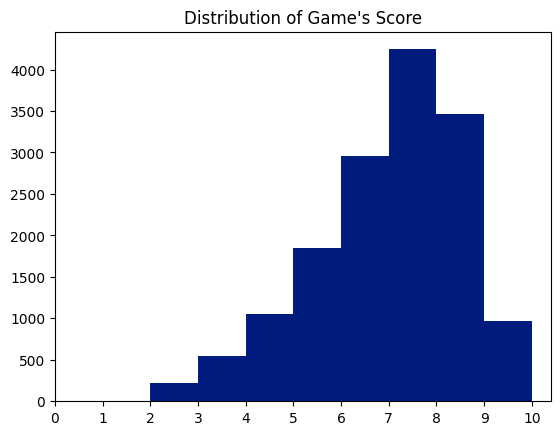

In [358]:
# distribution of scores

plt.hist(games_new["Score"], bins=[2,3,4,5,6,7,8,9,10])
plt.title("Distribution of Game's Score")
plt.xticks(np.arange(0, 11,1 ))
plt.show()

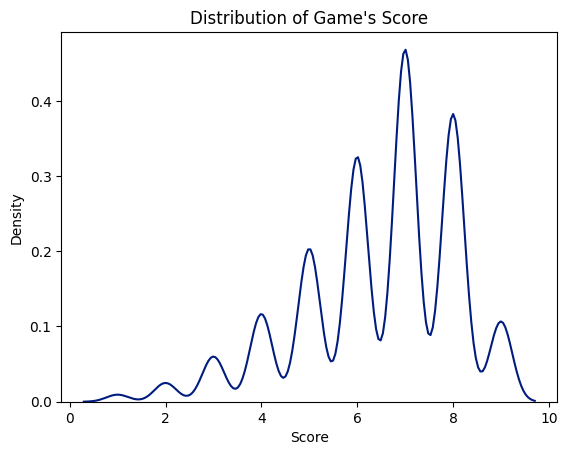

In [359]:
sns.kdeplot(games_new["Score"])
plt.title("Distribution of Game's Score")
plt.show()

<Axes: ylabel='Score'>

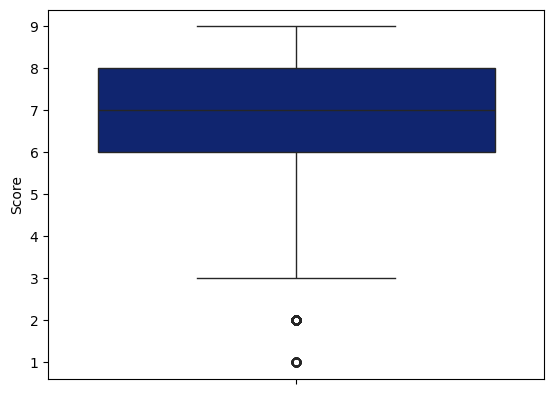

In [360]:
sns.boxplot(games["Score"])

In [361]:
# checking skewness in data
games_new["Score"].skew()


-0.7642961354528758

2. Review

<Axes: title={'center': 'Count of Type of Reviews'}, xlabel='Review Type', ylabel='Count'>

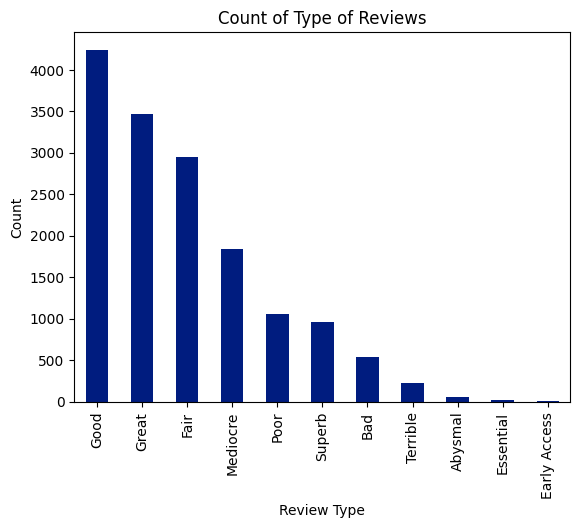

In [362]:
# count of Differnet Types of reviews 
games_new["Review"].value_counts().plot(kind="bar", title="Count of Type of Reviews", xlabel ="Review Type", ylabel="Count")

3. Console

Text(0, 0.5, 'Count of Games')

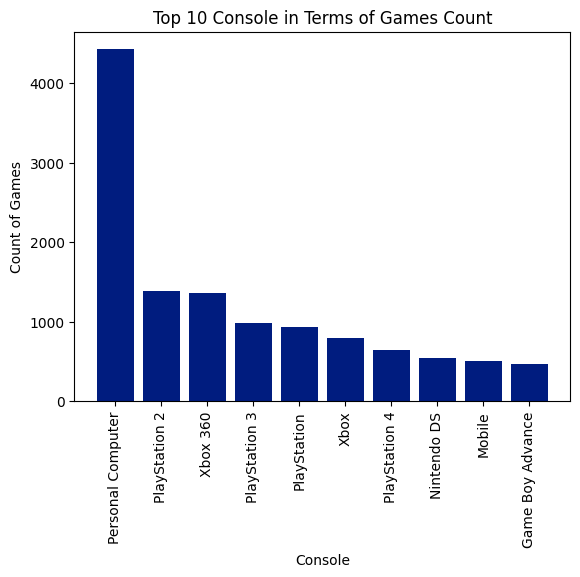

In [363]:
# Top 10 Consoles that has most games
series =games_new["Console"].value_counts().sort_values(ascending=False)[0:10]
plt.bar(series.index, series.values)
plt.xticks(rotation ="vertical")
plt.title("Top 10 Console in Terms of Games Count")
plt.xlabel("Console")
plt.ylabel("Count of Games")

### Grouped Analysis

In [364]:
games_new

,Console,GameName,Review,Score
0,Personal Computer,Baldur's Gate 3 Early Access,Early Access,6
1,Nintendo Switch,Control: Ultimate Edition Cloud Version,Good,7
2,Personal Computer,Ring Of Pain,Great,8
3,Nintendo Switch,Pikmin 3 Deluxe,Great,8
4,Personal Computer,Noita,Good,7
...,...,...,...,...
15380,Xbox 360,Lost Planet 3,Mediocre,5
15381,PlayStation 3,Lost Planet 3,Mediocre,5
15382,Personal Computer,Lost Planet 3,Mediocre,5
15383,Nintendo 3DS,Scribblenauts Unmasked,Mediocre,5


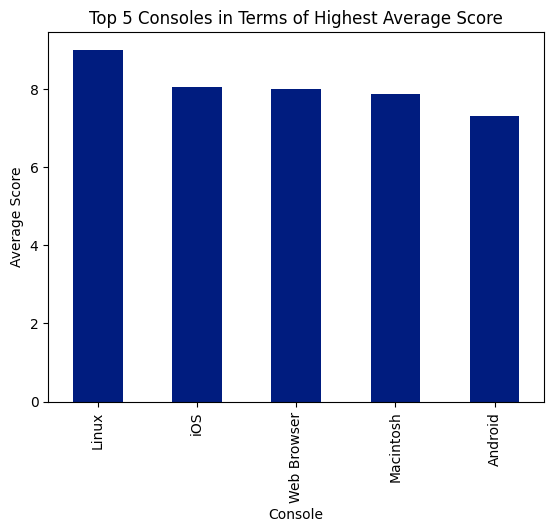

In [365]:
# Top 5 consoles in terms of highest average score
games_new.groupby("Console")["Score"].mean().sort_values(ascending=False)[0:5].plot(kind="bar", title="Top 5 Consoles in Terms of Highest Average Score", xlabel="Console", ylabel="Average Score")
plt.show()

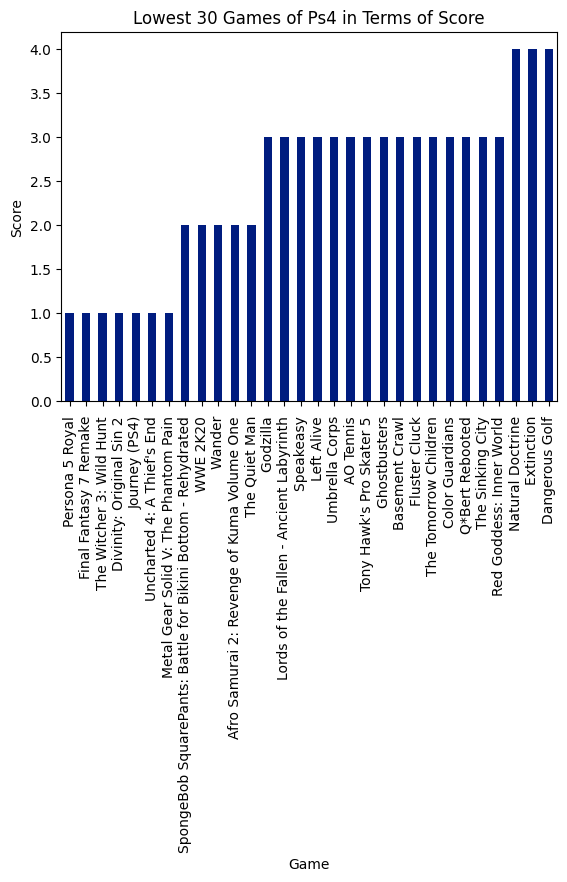

In [366]:
# Lowest 10 Games of ps4 in terms of Score
games_new[games_new["Console"]=="PlayStation 4"].groupby("GameName")["Score"].min().sort_values(ascending=True)[0:30].plot(kind="bar", title="Lowest 30 Games of Ps4 in Terms of Score", xlabel="Game", ylabel="Score")
plt.show()

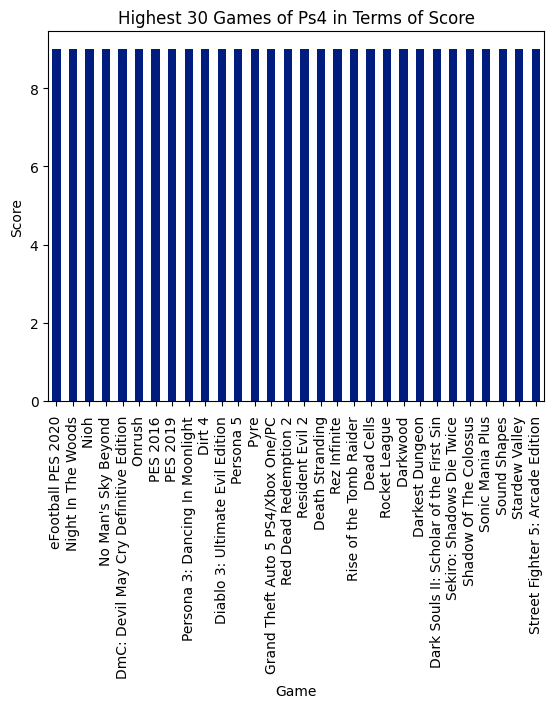

In [367]:
games_new[games_new["Console"]=="PlayStation 4"].groupby("GameName")["Score"].max().sort_values(ascending=False)[0:30].plot(kind="bar", title="Highest 30 Games of Ps4 in Terms of Score", xlabel="Game", ylabel="Score")
plt.show()

<Axes: title={'center': 'Highest 30 Games of PC in Terms of Score'}, xlabel='Game', ylabel='Score'>

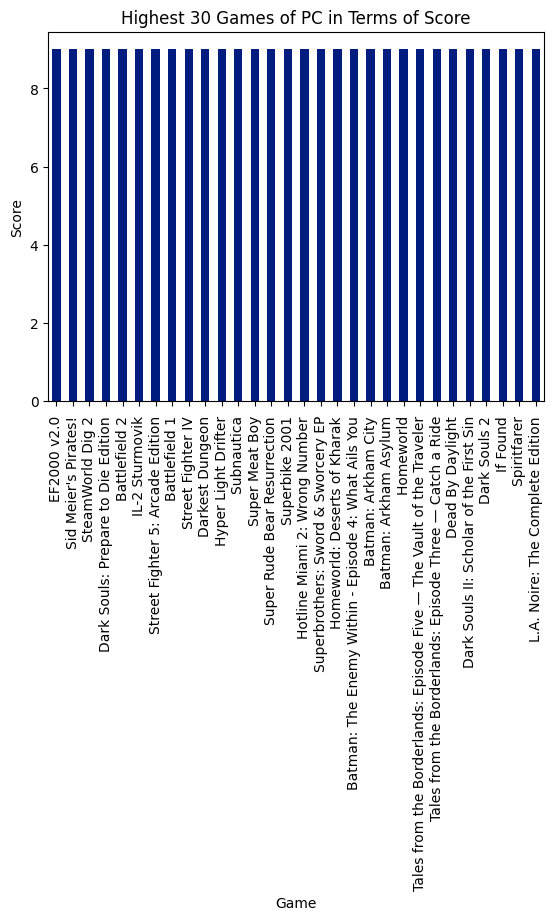

In [298]:
games_new[games_new["Console"]=="Personal Computer"].groupby("GameName")["Score"].max().sort_values(ascending=False)[0:30].plot(kind="bar", title="Highest 30 Games of PC in Terms of Score", xlabel="Game", ylabel="Score")

### Bivariate Analysis

In [368]:
# contingency table between console and review
pd.crosstab(games_new["Review"], games_new["Console"], normalize="columns")*100

Console,Android,Arcade,BlackBerry,Dreamcast,Famicom Disk System,Game Boy,Game Boy Advance,Game Boy Color,GameCube,Linux,...,TurboGrafx-CD,Web Browser,WebOS,Wii,Wii U,Windows Mobile,Xbox,Xbox 360,Xbox One,iOS
Review,,,,,,,,,,,,,,,,,,,,,
Abysmal,0.000000,0.0,0.0,0.754717,0.0,0.0,0.212766,0.694444,0.220751,0.0,...,0.000000,0.0,0.0,0.213675,0.000000,0.0,0.631313,0.000000,0.000000,0.000000
Bad,0.000000,0.0,0.0,3.396226,0.0,0.0,4.468085,6.250000,1.766004,0.0,...,0.000000,0.0,0.0,8.119658,1.449275,0.0,2.777778,3.235294,1.607717,1.612903
Early Access,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.643087,0.000000
Essential,0.000000,0.0,0.0,0.377358,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.213675,2.898551,0.0,0.000000,0.073529,0.321543,0.000000
Fair,7.692308,0.0,0.0,20.377358,100.0,20.0,19.574468,19.444444,23.620309,0.0,...,33.333333,0.0,0.0,20.512821,14.492754,0.0,21.464646,19.632353,13.183280,3.225806
Good,30.769231,100.0,25.0,23.396226,0.0,0.0,29.574468,26.388889,27.593819,0.0,...,66.666667,0.0,0.0,26.068376,21.739130,100.0,28.409091,28.235294,26.366559,11.290323
Great,46.153846,0.0,0.0,18.113208,0.0,60.0,22.127660,16.666667,23.620309,0.0,...,0.000000,100.0,25.0,16.025641,30.434783,0.0,23.358586,24.044118,31.832797,41.935484
Mediocre,0.000000,0.0,25.0,12.830189,0.0,0.0,11.063830,9.722222,11.920530,0.0,...,0.000000,0.0,25.0,13.034188,13.043478,0.0,10.227273,10.735294,6.752412,3.225806
Poor,7.692308,0.0,50.0,9.811321,0.0,20.0,6.382979,10.416667,5.298013,0.0,...,0.000000,0.0,25.0,11.324786,2.898551,0.0,6.691919,7.058824,3.858521,0.000000


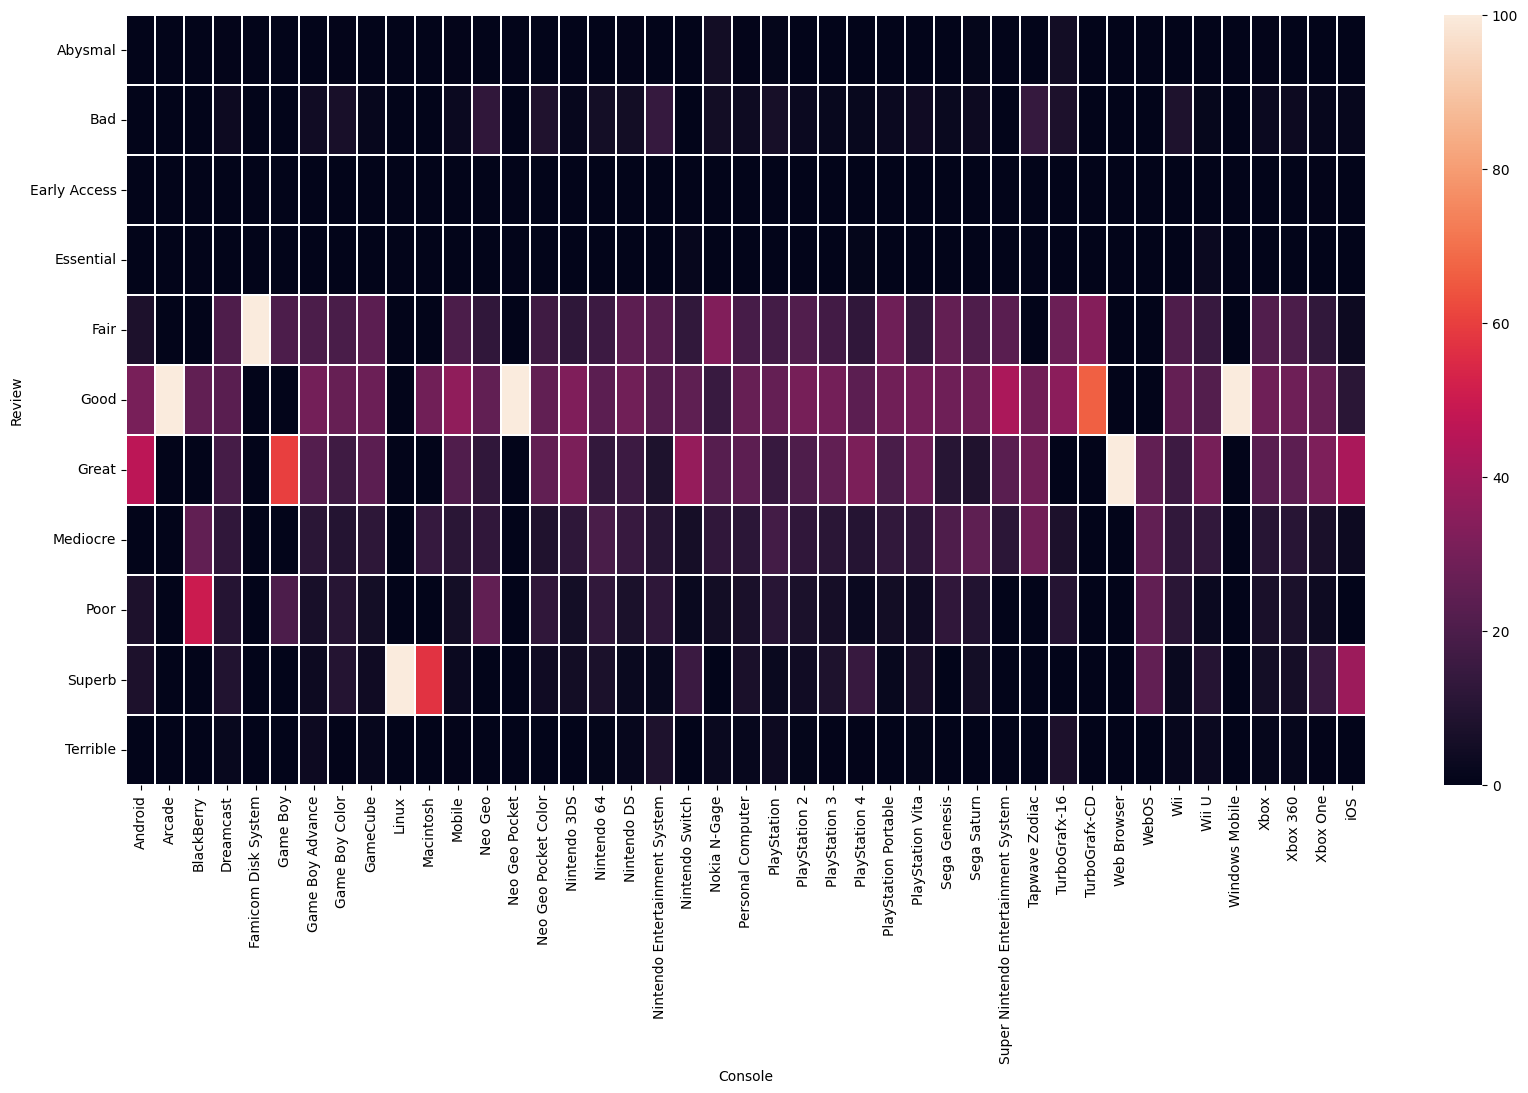

In [393]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.crosstab(games_new["Review"], games_new["Console"], normalize="columns")*100, linewidth=0.3)
plt.show()

C:\Users\faiqi\AppData\Local\Temp\ipykernel_23104\2323540340.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(games_new[games_new["Console"]==i]["Score"], label =i)
C:\Users\faiqi\AppData\Local\Temp\ipykernel_23104\2323540340.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(games_new[games_new["Console"]==i]["Score"], label =i)
C:\Users\faiqi\AppData\Local\Temp\ipykernel_23104\2323540340.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(games_new[games_new["Console"]==i]["Score"], label =i)
C:\Users\faiqi\AppData\Local\Temp\ipykernel_23104\2323540340.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(games_new[games_new["Console"]==i]["Score"], la

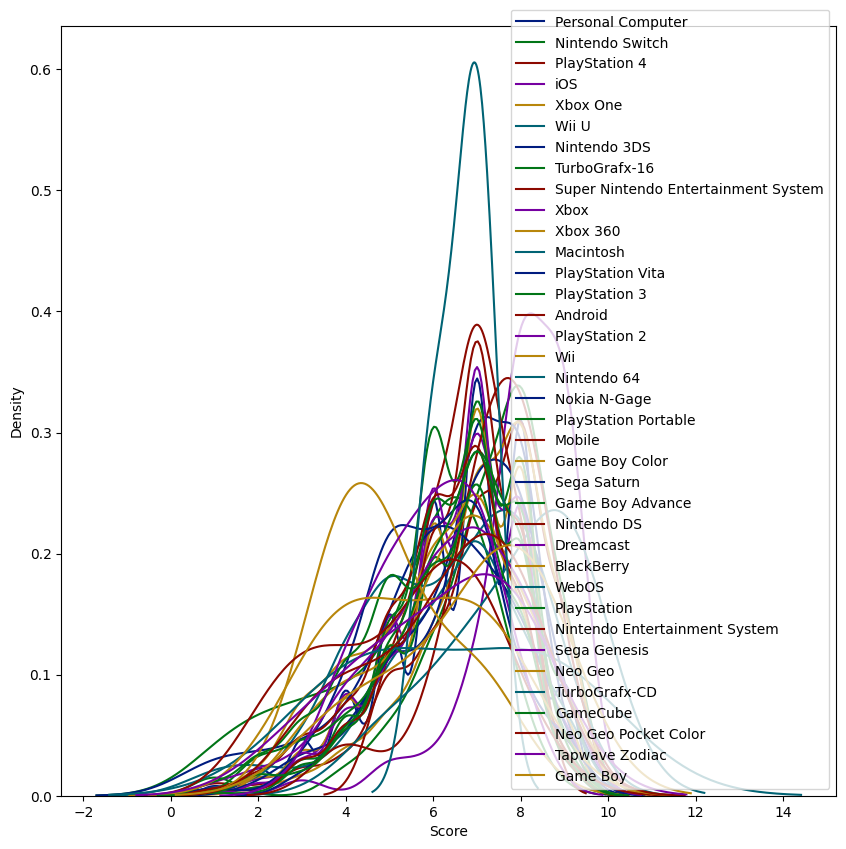

In [382]:
# Distribution of scores of each console
plt.figure(figsize=(10, 10))
for i in games_new["Console"].unique():
    sns.kdeplot(games_new[games_new["Console"]==i]["Score"], label =i)
plt.legend()

plt.show()
